# Análisis de riesgo criticio.

Curso de Data Science II: Machine Learning para la Ciencia de datos

Profesor: David Silvera

Alumna: Milenka Zuvic Pinochet


# Resumen

* En el ámbito financiero, anticipar el incumplimiento de pagos es crucial para la gestión del riesgo crediticio. Este trabajo utiliza modelos de machine learning, específicamente regresión logística y árboles de decisión, para predecir el riesgo de incumplimiento de préstamos. Utilizando un dataset público, se identificaron factores clave como el monto del préstamo, la tasa de interés, la calificación del préstamo, el porcentaje del ingreso destinado al préstamo, el ingreso del solicitante y su historial crediticio.

* El análisis reveló que tasas de interés más altas y mayores montos de préstamo están asociados con un mayor riesgo de incumplimiento. Los modelos desarrollados demostraron ser efectivos para clasificar los préstamos como 'pagados' o 'incumplidos', proporcionando una herramienta valiosa para que las instituciones financieras ajusten sus estrategias de crédito y mejoren la gestión del riesgo.

* En conclusión, este proyecto destaca la importancia del machine learning en la gestión del riesgo crediticio, ofreciendo un marco sólido para la toma de decisiones informadas y la mejora de la eficiencia operativa en el sector financiero.

# Objetivos

* El objetivo de este proyecto es desarrollar un modelo de machine learning que pueda predecir con precisión el riesgo de incumplimiento de los préstamos otorgados, utilizando datos históricos de los solcitantes y las condiciones del préstamo. Este análisis permitirá identificar las características y patrones asociados con un mayor riesgo de incumplimiento,  proporcionando a las instituciones financieras una herramienta valiosa para la gestión del riesgo credicio.

* Específicamente, se evaluarán y compararán distintos modelos de machine learning, incluyendo regresión logística y árboles de decisión, para determinar cuál ofrece el mejor rendimiento en términos de precisión y recall. 

# Contexto comercial

* Este proyecto demuestra la importancia de aplicar las técnicas avanzadas de machine learning y análisis de datos en la gestión financiera, ofreciendo una solución práctica para la evaluación del riesgo crediticio. 

* Financiera Soluciones S.A. es una institución financiera líder en el mercado, especializada en ofrecer productos de crédito personalizados y accesibles para una amplia gama de clientes. Con más de 20 años de experiencia en el sector, la empresa se ha consolidado como un referente en la gestión eficiente de riesgos crediticios y en la implementación de tecnologías avanzadas para la evaluación y concesión de préstamos.

* En un entorno económico cada vez más dinámico y competitivo, Financiera Soluciones S.A. se enfrenta al desafío de mantener la estabilidad financiera y maximizar la rentabilidad mientras ofrece productos de crédito a una base de clientes diversa, por lo que l a capacidad de predecir con precisión los incumplimientos de préstamos es crucial para la salud financiera de Financiera Soluciones S.A. Un modelo predictivo efectivo no solo ayuda a reducir las pérdidas por incumplimientos, sino que también permite a la empresa ajustar sus estrategias de marketing y producto para atraer y retener a los clientes más valiosos. Al identificar correctamente los préstamos de alto riesgo, la empresa puede ofrecer condiciones más favorables a los clientes de bajo riesgo, mejorando su satisfacción y fidelización.

* Este proyecto demuestra la importancia de aplicar las técnicas avanzadas de machine learning y análisis de datos en la gestión financiera, ofreciendo una solución práctica para la evaluación del riesgo crediticio. 

# Base de datos 📃

* Se utiliza una base de datos obtenida en la página kaggle, la cual  posee 32581  filas y 12 variables de las personas que tienen un préstamo vigente con una institución bancaria. La variable objetivo es "loan_status", que indica si un préstamo ha sigo pagado (0), impago (1). 

* Las variables incluyen tanto atributos del solcitante (Edad, ingresos, propietarios de vivienda, duración del empleo, historial crediticio) como el préstamo (monto del préstamo, tasa de interés, porcentaje del ingresos destinado al préstamos, intención del préstamo, calificación del préstamo).

**Definición de columnas**

|         Variable             |                    Definición                                                         |
|------------------------------|---------------------------------------------------------------------------------------|
| `person_age`                 |                Edad de la persona                                                     |
| `person_income`              |                 Ingresos anuales                                                      |
| `person_home_ownership`      |  Propietarios de la vivienda (Rent: Renta, Own: Vivienda propia, Mortgage: Hipoteca)  |
| `person_emp_length`          |              Duración del empleo (en años)                                            |
| `loan_intent`                |                Intención de prestamo                                                  |
| `loan_grade`                 |                 Calificación del prestamo                                             |
| `loan_amnt`                  |                Cantidad del prestamo                                                  |
| `loan_int_rate`              |                    Tasa de interés del préstamo                                       |
| `loan_status`                |   Estado del prestámo (0 es no impago, 1 es impago)                                   |
| `loan_percent_income`        |                 Porcentaje de ingresos destinados al préstamo                         |
| `cb_person_default_on_file`  |            Historial de incumplimiento                                                | 
| `cb_person_cred_hist_length` |           Duración del historial del crédito                                          |


# Problemática de Negocio: Hipótesis y preguntas guías.

**Hipótesis**
* Utilizando datos sobre características del solicitante y detalles del préstamo, un modelo de machine learning, como la regresión logística o un árbol de decisión, puede clasificar con precisión si un préstamo será pagado o incumplido. 

**Preguntas guía**
* Distribución del estado del préstamo. 
* Distribución del monto del préstamo entre los diferentes estados del préstamo 
* ¿Cómo se distribuye el monto del préstamo para diferentes estados del préstamo? 
* ¿Distribución de la tasa de interés respecto al estado del préstamo? 
* ¿Cómo se distribuye el monto del préstamo por diferentes calificaciones del préstamo? 
* ¿Cómo varía el riesgo de incumplimiento en función del ingreso anual de la persona? 
* ¿Influye el historial crediticio de la persona en la probabilidad de incumplimiento de préstamos de mayor cantidad? 
* ¿Influye la edad de la persona en la probabilidad de incumplimiento? 


In [1]:
# Importamos librerías

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import math
from scipy.stats import uniform, randint
import plotly as pl 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, log_loss
from sklearn import metrics
sns.set_style('whitegrid')
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree


In [2]:
# Importamos el dataset
datacredit = pd.read_csv("credit_risk_dataset.csv")
datacredit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
# Observación de columnas  
datacredit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
# Visualizamos la forma de la data
datacredit.shape

(32581, 12)

In [5]:
# Visualizamos la información de la data. Observamos los tipos de datos de cada columna, y además se puede notar que hay datos nulos
# existentes en la columna person_emp_length y loan_int_rate.
# Las variables se componen por  5 variables integer, 4 variables object y 3 variables float.
datacredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# Visualizamos la estadística de la data. 
datacredit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
# Vemos los valores nulos en la data, con esto comprobamos las columnas con nulos 

datacredit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
len(datacredit)

32581

In [9]:
# Comprobando los valores faltantes en porcentaje
(datacredit.isnull().sum() / len(datacredit)).sort_values(ascending=False) * 100

loan_int_rate                 9.563856
person_emp_length             2.747000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

Text(0.5, 0, 'Duración del empleo (años)')

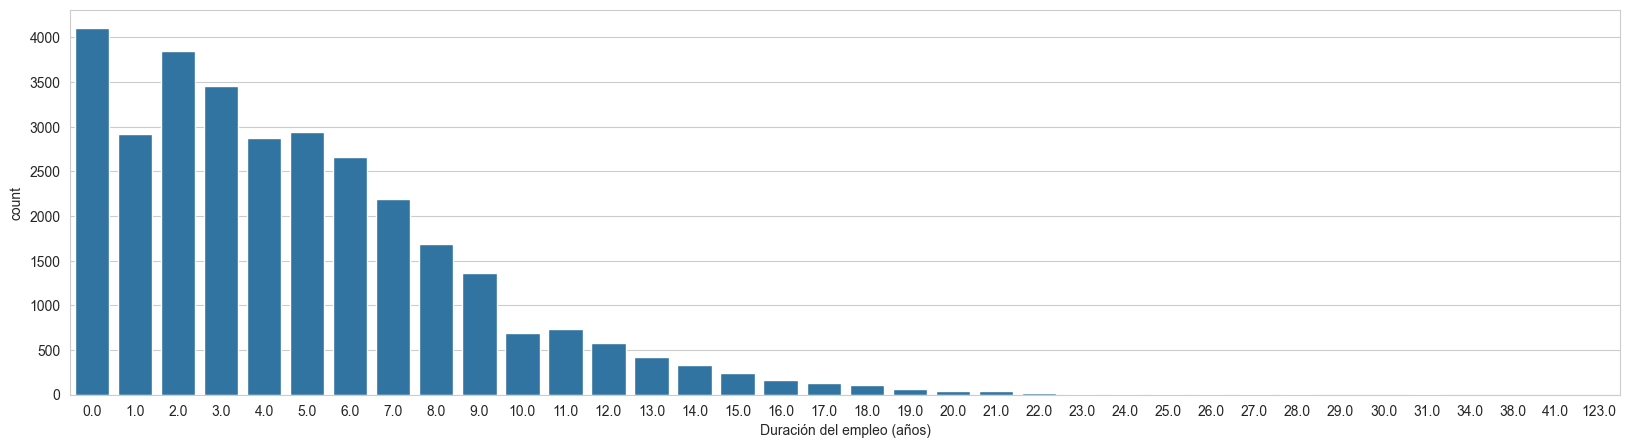

In [10]:
# Revisamos el comportamiento de las columnas que tienen valores nulos
plt.figure(figsize=(20, 5))

sns.countplot(x='person_emp_length', data=datacredit)
plt.xlabel('Duración del empleo (años)')

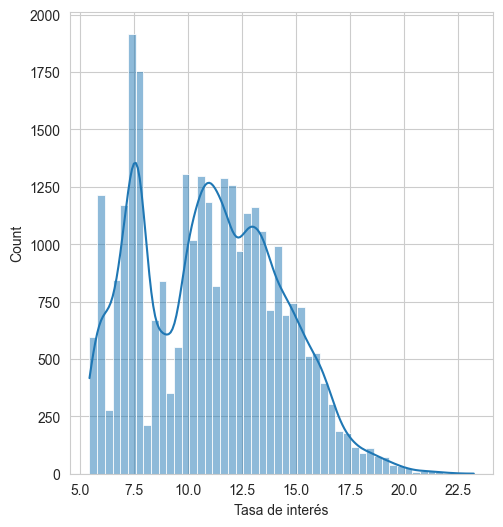

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(datacredit['loan_int_rate'], kde=True)
plt.xlabel('Tasa de interés')

plt.show()

In [12]:
# Verificamos la moda, y la mediana de las dos columnas.
print('person_emp_length mode {}'.format(datacredit['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(datacredit['person_emp_length'].median()))
print('loan_int_rate mode {}'.format(datacredit['loan_int_rate'].mode()[0]))
print('loan_int_rate median{}'.format(datacredit['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 7.51
loan_int_rate median10.99


In [13]:
#  Dado el comportamiento asimetrico de las variables se utilizara el valor de la mediana de cada columna
datacredit['person_emp_length'].fillna(datacredit['person_emp_length'].median(), inplace=True)
datacredit['loan_int_rate'].fillna(datacredit['loan_int_rate'].median(), inplace=True)

C:\Users\milen\AppData\Local\Temp\ipykernel_28480\1921644911.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datacredit['person_emp_length'].fillna(datacredit['person_emp_length'].median(), inplace=True)
C:\Users\milen\AppData\Local\Temp\ipykernel_28480\1921644911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [14]:
# Verificamos nuevamente que no hayan nulos. 
datacredit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
datacredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [16]:
# Realizamos un filtro que solo nos contemple las variables númericas. 
df_corr = datacredit[['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length']]
df_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


(10.0, 0.0)

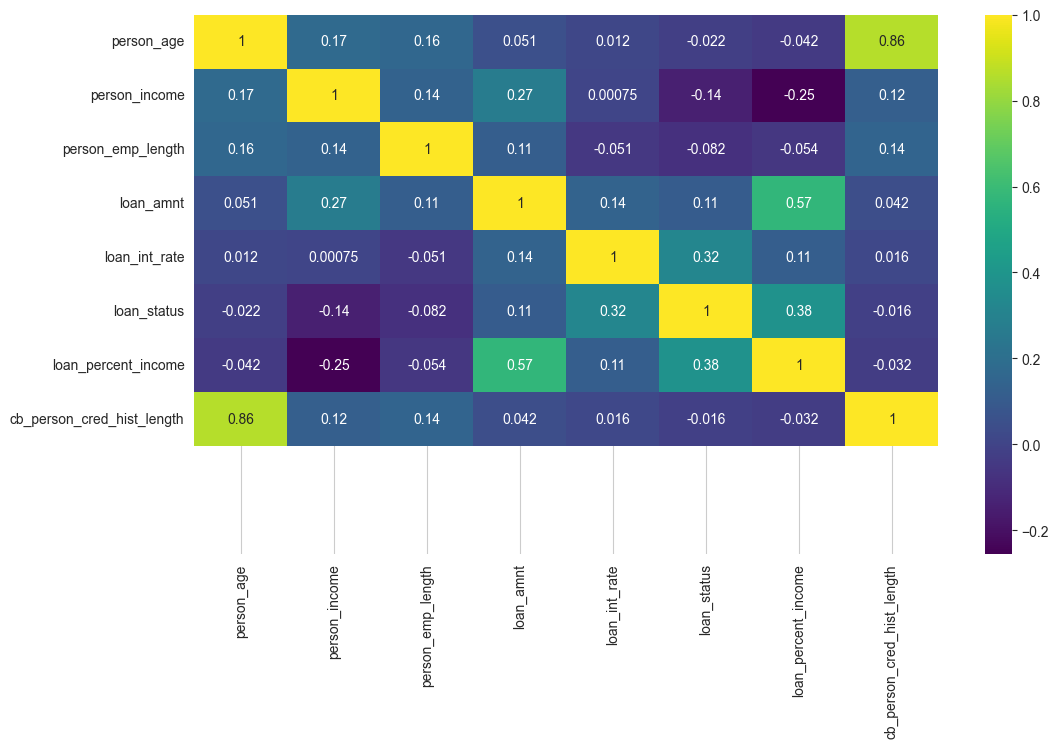

In [17]:
# Calculamos la matriz de correlación.

plt.figure(figsize=(12,7))
sns.heatmap(df_corr.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

* Acorde a la matriz de correlación podemos observar que las variables más fuertemente correlacionadas serian las que presentan sobre 0.5, las cuales serían la duración del historial del credito con la edad de la persona, porcentaje de ingreso de la persona con la cantidad del préstamo.
* Por otro lado las variables que se encuentran debilmente correlacionadas serían: Cantidad del préstamo con los ingresos anuales, el estado del préstamo con la tasa de interes, el porcentaje de ingreso de la persona con el estado del préstamo.
* A su vez, se puede observar que el ingreso de la persona tiene una correlación negativa con el estado de préstamo, suguiriendo que a mayores ingresos pueden estar asociados con un menor riesgo de incumplimiento.

In [18]:
from scipy.stats import chi2_contingency

In [19]:
#Realizamos una prueba de chi-cuadrado entre la variable target "loan_status" y otras variables categóricas
#Variables categóricas que se ocuparan para la prueba chi-cuadrado 
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

chi_resultados = {}

In [20]:
# Calculamos chi_cuadrado
for col in categorical_columns:
    contingency_table = pd.crosstab(datacredit['loan_status'], datacredit[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_resultados[col] = {'chi2': chi2, 'p_value': p, 'dof': dof, 'expected': expected}

chi_resultados

{'person_home_ownership': {'chi2': 1907.980698188821,
  'p_value': 0.0,
  'dof': 3,
  'expected': array([[10511.00371382,    83.65645622,  2020.26432583, 12858.07550413],
         [ 2932.99628618,    23.34354378,   563.73567417,  3587.92449587]])},
 'loan_intent': {'chi2': 520.5115614374077,
  'p_value': 2.980681669776041e-110,
  'dof': 5,
  'expected': array([[4074.9294374 , 5045.18796231, 2818.51892207, 4746.52659525,
          4316.51677358, 4471.32030938],
         [1137.0705626 , 1407.81203769,  786.48107793, 1324.47340475,
          1204.48322642, 1247.67969062]])},
 'loan_grade': {'chi2': 5609.184186567319,
  'p_value': 0.0,
  'dof': 6,
  'expected': array([[8425.84699672, 8170.96844787, 5049.09714251, 2834.9374789 ,
           753.68994199,  188.4224855 ,   50.03750652],
         [2351.15300328, 2280.03155213, 1408.90285749,  791.0625211 ,
           210.31005801,   52.5775145 ,   13.96249348]])},
 'cb_person_default_on_file': {'chi2': 1044.4395947711112,
  'p_value': 3.9346601

Podemos observar que cada una de las variables categóricas analizadas muestra una asociación significativa con la variable objetivo loan_status. Sin embargo, la magnitud de los valores de la chi-cuadrado nos indica que la variable loan_grade podria sr la que tiene la relación más fuerte con el estado del préstamo. 

# Visualización de Outliers

### Boxplot

In [21]:
datacredit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Text(0.5, 0, 'Monto')

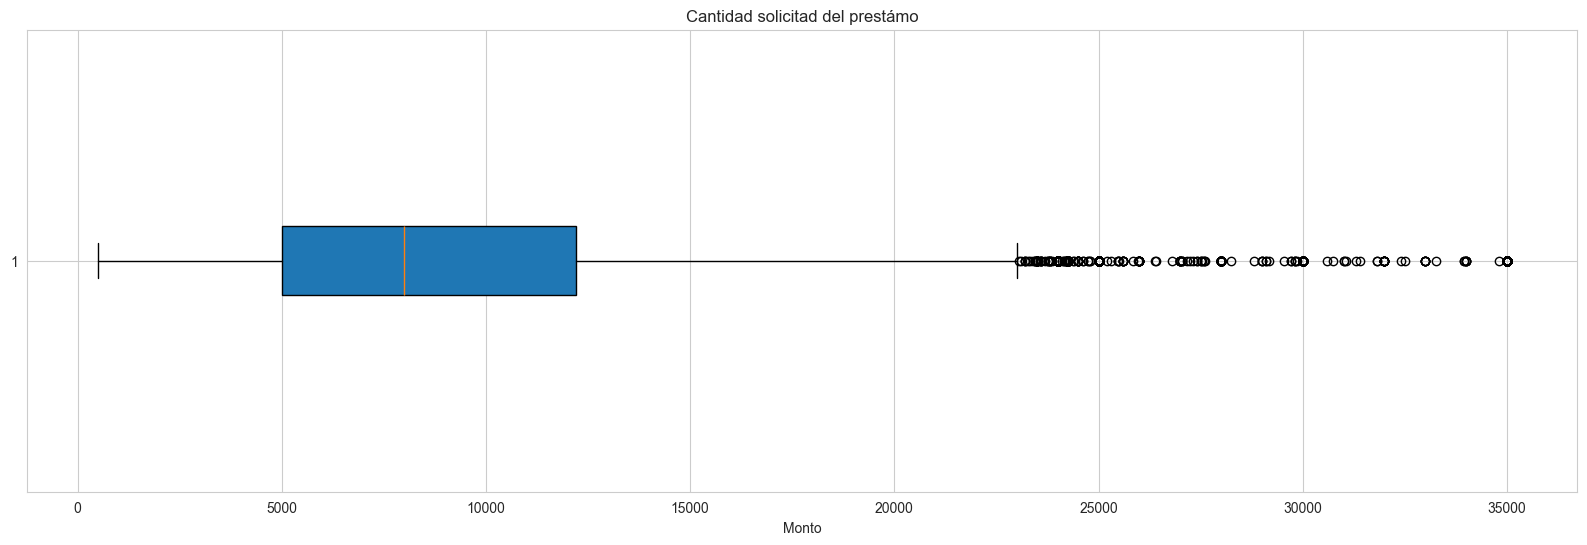

In [22]:
plt.figure(figsize=(20, 6))
plt.boxplot(datacredit['loan_amnt'], vert=False, patch_artist= True)
plt.title('Cantidad solicitad del prestámo')
plt.xlabel('Monto')

* Los outliers en los montos del préstamo se encuentran superiores a los 20000 llegando ahasta los 35000

In [23]:
# Filtramos la data para tener solo las variables númericas
data_filtrada = datacredit[['person_age', 'person_emp_length', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']]


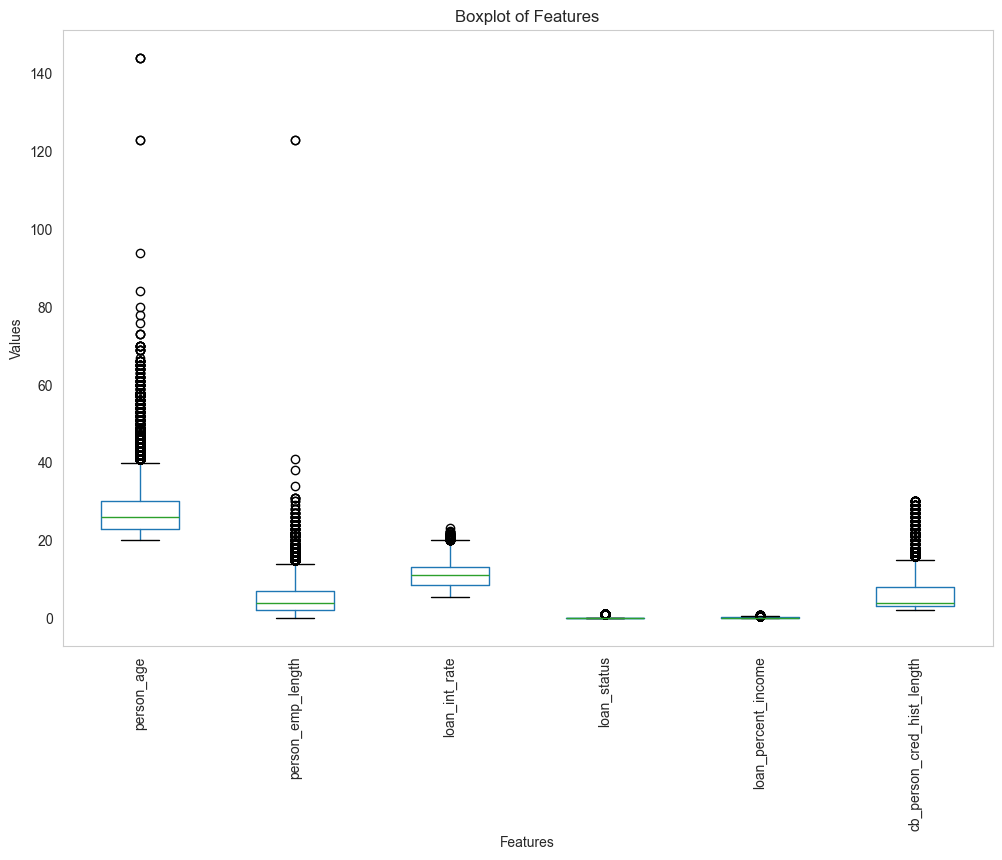

In [24]:
## Variables analizar por separado person_income, loan_amnt
plt.figure(figsize=(12, 8))
data_filtrada.boxplot(rot=90, grid=False)

plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

* Los outliers de las edades de las personan abarcar entre los 40 a los 140, encontrando dos valores superiores a los 100, los cual es irrazonable ya que las personas no viven a los 120 ni a los 140.
* Los outliers de la duración del empleo de las personas abarca aproximadamente entre los 20 a los 40 años, siendo valores unicos entre los 35 a los 40 años. 


### Isolation Forest

In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [26]:
# Definimos las columnas categóricas y numéricas
categoricas = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
numericas = [col for col in datacredit.columns if col not in categoricas + ['loan_status']]


In [27]:
# Estandarizamos y codficamos 
pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericas),             # Escalar las columnas numéricas
        ('cat', OneHotEncoder(drop='first'), categoricas) # Codificación One-Hot para las categóricas
    ]
)


In [28]:
pipeline = Pipeline(steps=[
    ('preprocessor', pre),
    ('isolation_forest', IsolationForest(
        n_estimators=500,               # Número de árboles
        max_samples='auto',             # Muestras para entrenar cada árbol
        contamination=0.01,             # Proporción de anomalías esperadas
        random_state=42                # Semilla para reproducibilidad
    ))
])
pipeline.fit(datacredit)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('isolation_forest',
                 IsolationForest(contamination=0.01, n_estimators=500,
                                 random_state=42))])

In [29]:
datacredit['anomaly_score'] = pipeline.predict(datacredit)
datacredit['high_risk'] = datacredit['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)
anomalies = datacredit[datacredit['high_risk'] == 1]

print(f"Número de anomalías detectadas: {len(anomalies)}")
anomalies

Número de anomalías detectadas: 326


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,anomaly_score,high_risk
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,-1,1
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,1,0.32,N,4,-1,1
21,25,137000,RENT,9.0,PERSONAL,E,34800,16.77,0,0.25,Y,2,-1,1
36,22,48000,RENT,1.0,EDUCATION,E,30000,18.39,1,0.63,N,2,-1,1
43,23,300000,OWN,1.0,EDUCATION,F,24250,19.41,0,0.08,Y,2,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.38,0,0.15,N,21,-1,1
32563,52,71520,RENT,0.0,EDUCATION,E,7000,16.82,1,0.10,Y,24,-1,1
32568,60,49008,OWN,5.0,PERSONAL,C,12000,13.79,0,0.24,Y,21,-1,1
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19,-1,1


El Isolation Forest detecto 326 registro como anomalías, lo cual sugiere que estos datos no se comportan de mandera consistente con el resto del conjunto. Algunos registros presentan combinaciones inusuales, como altos años de experiencia combinados con edades relativamente bajas, lo cual es inconsistente. También se detectaron préstamos con proporciones altas de ingresos destinados al pago del préstamo, indicando un posible riesgo de incumplimiento. 
Debido a que no obtenemos más información para poder identificar estas anomalias, como datos atipicos o datos que sean casos especiales, los etiquetaremos en la columna High Risk  donde 1 es comportamiento inusual y poco comun considerandose de alto riego y 0 son no anomalos indicando un riesgo estandar o normal, esto nos permite que el posterior modelo de machine learning use la información de estos registros para mejorar la predicción del riesgo de incumplimiento. 

# Visualizaciones  exploratorias📊

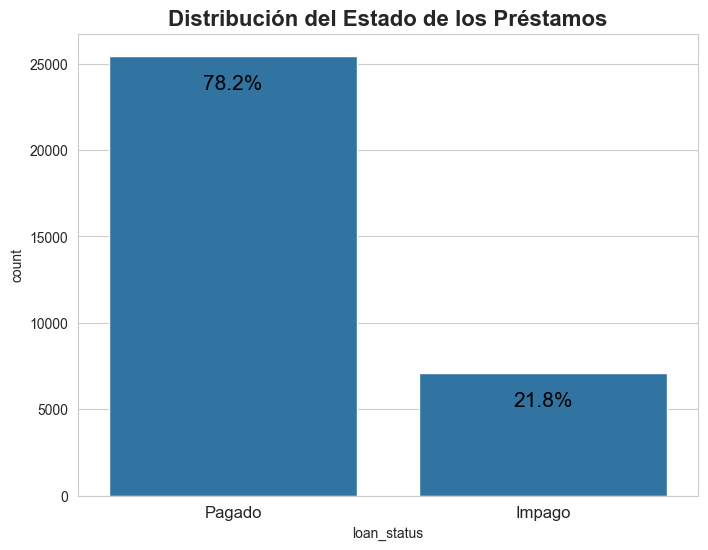

In [30]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='loan_status', data=datacredit, order=[0, 1])

plt.title('Distribución del Estado de los Préstamos', fontsize=16, weight='bold')
plt.xticks(ticks=[0, 1], labels=['Pagado', 'Impago'], fontsize=12)

total = len(datacredit['loan_status'])

for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.1f}%'  
    ax.annotate(porcentaje,
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=15, color='black',
                xytext=(0, -20), textcoords='offset points') 


plt.show()

* En el gráfico podemos observar que el estado del préstamo es  de un 78.2% para los prestamos pagados y 21.8% para los impagos

# Distribución del monto del préstamo entre los diferentes estados del préstamo

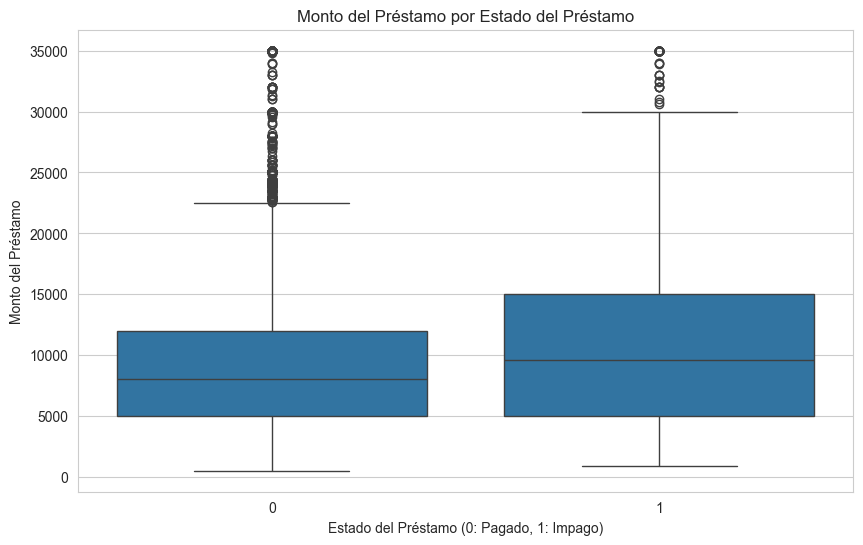

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=datacredit, x='loan_status', y='loan_amnt')
plt.title('Monto del Préstamo por Estado del Préstamo')
plt.xlabel('Estado del Préstamo (0: Pagado, 1: Impago)')
plt.ylabel('Monto del Préstamo')
plt.show()

In [32]:
# Calculamos la estadistica para la cantidad del préstamo agrupado por el monto del préstamo 
ss = datacredit.groupby('loan_status')['loan_amnt'].describe().reset_index()
ss[''] = ['Pagado','Impago']
ss.set_index('')

,loan_status,count,mean,std,min,25%,50%,75%,max
,,,,,,,,,
Pagado,0,25473.0,9237.464178,6026.375457,500.0,5000.0,8000.0,12000.0,35000.0
Impago,1,7108.0,10850.502954,7143.345344,900.0,5000.0,9600.0,15000.0,35000.0


* Podemos apreciar en base al boxplot y la estadistica calculada, que para los préstamos pagados la mediana se encuentra en los 8000 dolares. La mayor densidad de los prestamos pagados abarca entre los 5000 y 12000 dolares. Mientras que los valores atipicos indican una presencia de montos pagados de valores muy altos. 
* En los datos impagos podemos ver que la mediana es un poco más alta de 9600 dolares, además se observan una mayor variabilidad de montos impagados, la mayor densidad de los montos impagados se encuentran entre los 5000 y los 15000. 


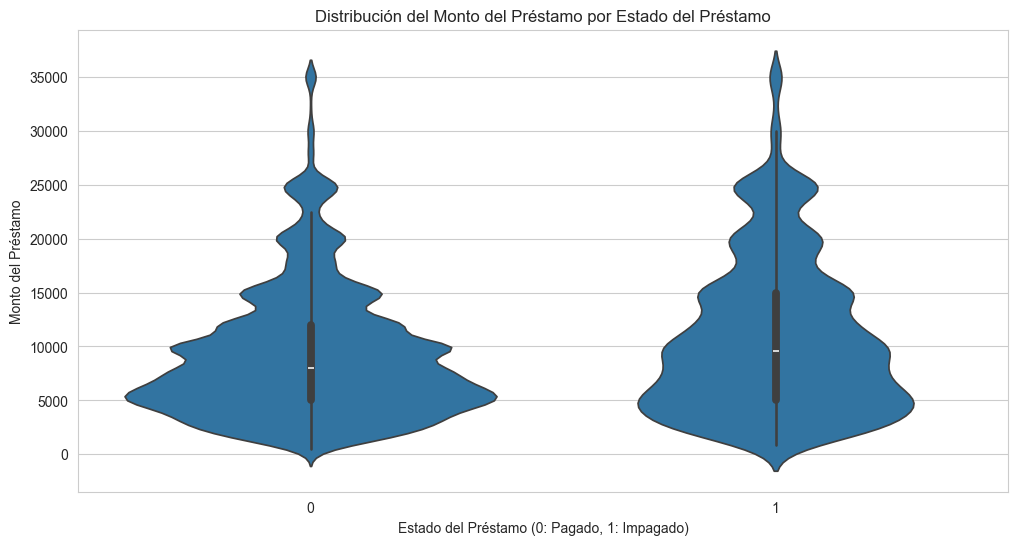

In [33]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=datacredit, x='loan_status', y='loan_amnt')
plt.title('Distribución del Monto del Préstamo por Estado del Préstamo')
plt.xlabel('Estado del Préstamo (0: Pagado, 1: Impagado)')
plt.ylabel('Monto del Préstamo')
plt.show()

* Observando el gráfico la densidad más es mayor en los montos más bajos, con la mayor concentración de datos alrededor de los 5000 a los 10000. Esto sugiere que los préstamos pagados tienden a ser de montos menores. Como se observo de igual manera en el boxplot. 

* los préstamos impagados indica una densidad más alta entre los montos cercanos a los 10000 - 15000. Se puede observan que existe una mayor dispersión en los montos, con muchos préstamos de montos altos que no han sido pagados. 

**¿Cómo se distribuye el monto del préstamo para diferentes estados del préstamo?**

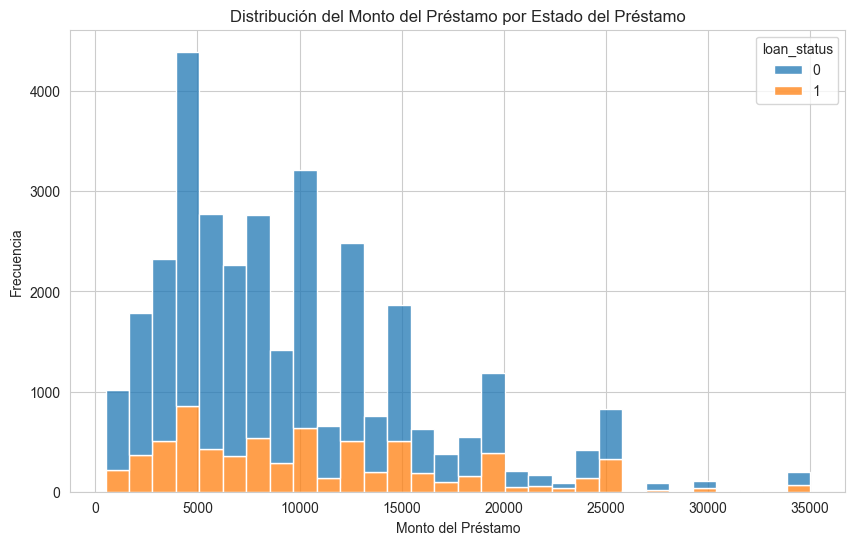

In [34]:
# Realizamos un histograma con las variables monto del préstamo y estado del préstamos
# para ver la distribucion del préstamo en sus diferentes estados
plt.figure(figsize=(10, 6))
sns.histplot(data=datacredit, x='loan_amnt', hue='loan_status', multiple='stack', bins=30)
plt.title('Distribución del Monto del Préstamo por Estado del Préstamo')
plt.xlabel('Monto del Préstamo')
plt.ylabel('Frecuencia')
plt.show()


* Podemos observar que la mayoria de los préstamos se concentran en el rango entre los 500 a los 10000. Indicando que la parte de los préstamos pagados y una cantidad significativa de los préstamos impagados se encuentran especialmente alrededor de los 5000. Por otro lado, la segunda concentración más significativa sería entre los 10000 a  20000, con una creciente proporcion de préstamos impagados cercanno a los 10000, entre los 10000 y 15000, 15000 y cercano a los 20000. Los préstamos de 20000 a 35000 se vuelven menos frecuentes, pero la proporción de los préstamos impagados en relación a los préstamos pagados parece aumentar.
* El gráfico sugiere una correlación entre el monto del préstamo y el estado del préstamo. A medida que aumenta el monto, la proporcion de préstamos impagados parece aumentar en relación a los préstamos pagados. Por otra parte, se puede observar entonces que los préstamos pagados se concentran principalmente en los montos más bajos. 

# Distribución de la tasa de interés respecto al estado del préstamo

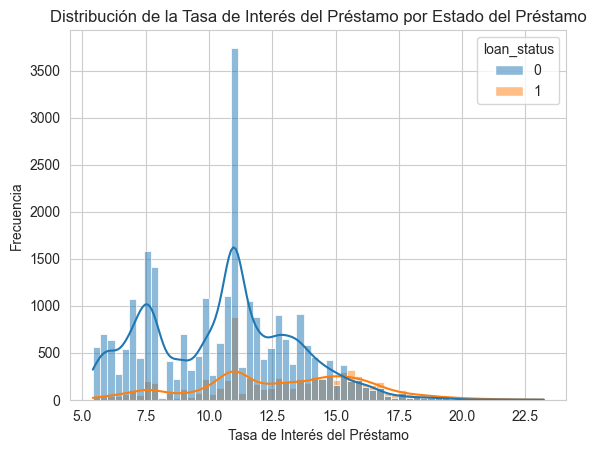

In [35]:
sns.histplot(data=datacredit, x='loan_int_rate', hue='loan_status', kde=True)
plt.title('Distribución de la Tasa de Interés del Préstamo por Estado del Préstamo')
plt.xlabel('Tasa de Interés del Préstamo')
plt.ylabel('Frecuencia')
plt.show()

* La tasa de interés más común para los préstamos pagados (estado 0) se encuentra alrededor del 10-12.5%. Hay un pico notable en esa región, indicando una mayor concentración de préstamos con esa tasa de interés que han sido pagados.

* Los préstamos con tasas de interés más altas tienen una mayor probabilidad de incumplimiento. Esto sugiere que la tasa de interés es un factor crítico en la evaluación del riesgo de incumplimiento.

¿Cómo se distribuye el monto del préstamo por diferentes calificaciones de préstamo?

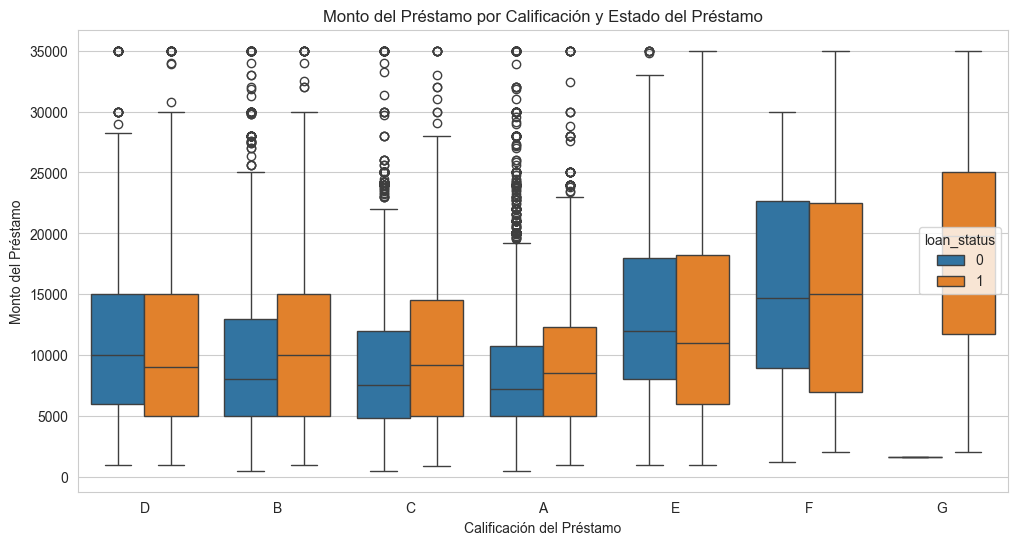

In [36]:
# Realizamos un boxplot con las variables calificación del préstamo y monto del préstamo para ver la distribución
# en conjunto con el estado del préstamo. 

plt.figure(figsize=(12, 6))
sns.boxplot(data=datacredit, x='loan_grade', y='loan_amnt', hue='loan_status')
plt.title('Monto del Préstamo por Calificación y Estado del Préstamo')
plt.xlabel('Calificación del Préstamo')
plt.ylabel('Monto del Préstamo')
plt.show()

* Como se puede observar en el gráfico, en las calificaciones de los préstamos de la A a la D, los montos de los préstamos pagados son similares a los impagados. En las calificaciones de la E a G, los préstamos pagados tienen a ser de montos altos, aunque tambien hay una notable cantidad de préstamos pagados con montos moderados. 


# ¿Cómo varía el riesgo de incumplimiento en función del ingreso anual de la persona?


C:\Users\milen\AppData\Local\Temp\ipykernel_28480\760804550.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='person_income', data=data_filtrada, palette='muted')


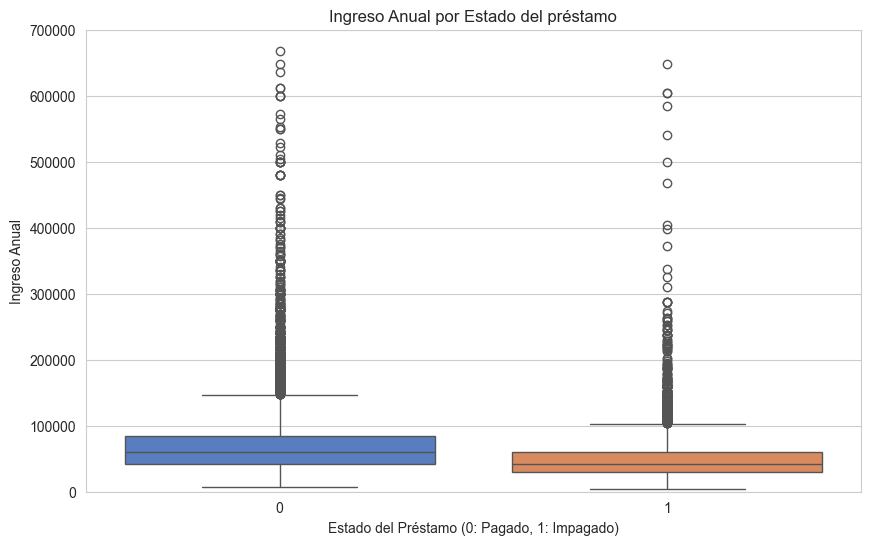

In [37]:
# Primero filtramos la data, ya que existen muchos valores outliers referentes al ingreso anual de la persona
data_filtrada = datacredit[datacredit['person_income'] < 700000]

# Gráficamos en un boxplot las variables estado del préstamo y la data filtrada de los ingresos anuales 
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=data_filtrada, palette='muted')
plt.title('Ingreso Anual por Estado del préstamo')
plt.suptitle('')
plt.xlabel('Estado del Préstamo (0: Pagado, 1: Impagado)')
plt.ylabel('Ingreso Anual')
plt.ylim(0, 700000)
plt.show()

In [38]:
# Calculamos la estadistica para la cantidad del préstamo agrupado por el monto del préstamo 
si = datacredit.groupby('loan_status')['person_income'].describe().reset_index()
si[''] = ['Pagado','Impagado']
si.set_index('')

,loan_status,count,mean,std,min,25%,50%,75%,max
,,,,,,,,,
Pagado,0,25473.0,70804.361559,66568.802606,7000.0,42000.0,60000.0,84000.00,6000000.0
Impagado,1,7108.0,49125.652223,36907.376527,4000.0,30000.0,41498.0,59497.75,703800.0


* Los préstamos pagados tienen una mediana de ingreso anual de  60000 dolares, indicando ingresos generalmente más altos.
* Los préstamos impagados tienen una mediana del ingreso anual de aproximadamente 41000 dolares. Sugiriendo que aquellos con menores ingresos tienen una mayor probabilidad de incumplir sus préstamos. 
* Se puede observar una relación entre el ingreso anual y la probabilidad de un préstamo pagado o impagado. Las personas con ingresos más altos tienden a pagar sus préstamos, mientras que aquellos que con ingresos más bajos tienen una mayor probabilidad de incumplimiento. 

# ¿Influye el historial crediticio de la persona en la probabilidad de incumplimiento de préstamos de mayor cantidad?

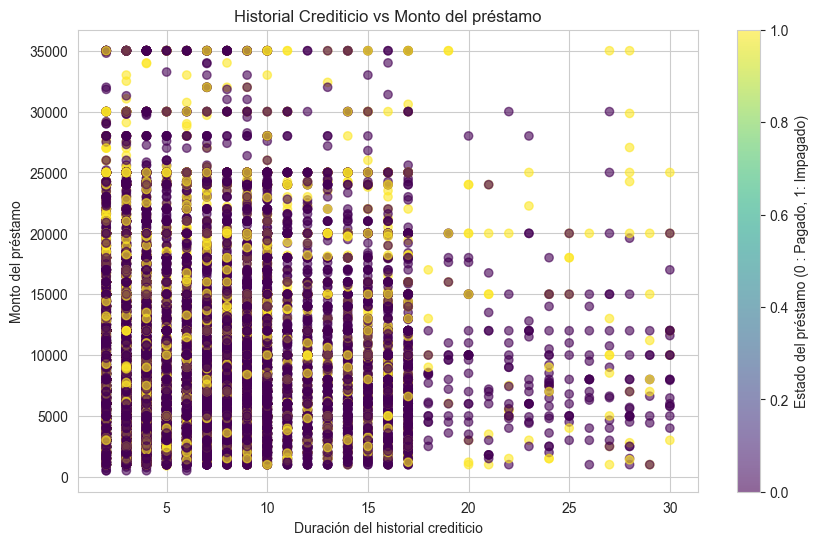

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(datacredit['cb_person_cred_hist_length'], datacredit['loan_amnt'], c=datacredit['loan_status'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Estado del préstamo (0 : Pagado, 1: Impagado)')
plt.xlabel('Duración del historial crediticio')
plt.ylabel('Monto del préstamo')
plt.title('Historial Crediticio vs Monto del préstamo')
plt.show()

* Podemos observar que:
  * La mayoria de los préstamos se encuentran entre los 0 a 15 años de  historial crediticio.
  * A pesar de que se observa una notable cantidad de préstamos con montos altos, no se observa una dependencia con la duración del historial crediticio. 
  * Los prestamos impagados estan distribuidos a lo largo de diferentes duraciones del historial crediticio. 
  * Los montos impagados incluyen tanto montos bajos como montos altos.
  * Existe una mayor concentración de préstamos pagados en la duración de  0 a 15 años del historal crediticio. 
  * La presencia de préstamos tanto pagados como impagados a lo largo de todas las duraciones del historial crediticio sugiere que la duración del historial crediticio por sí sola no es un factor determinante del estado del préstamo.

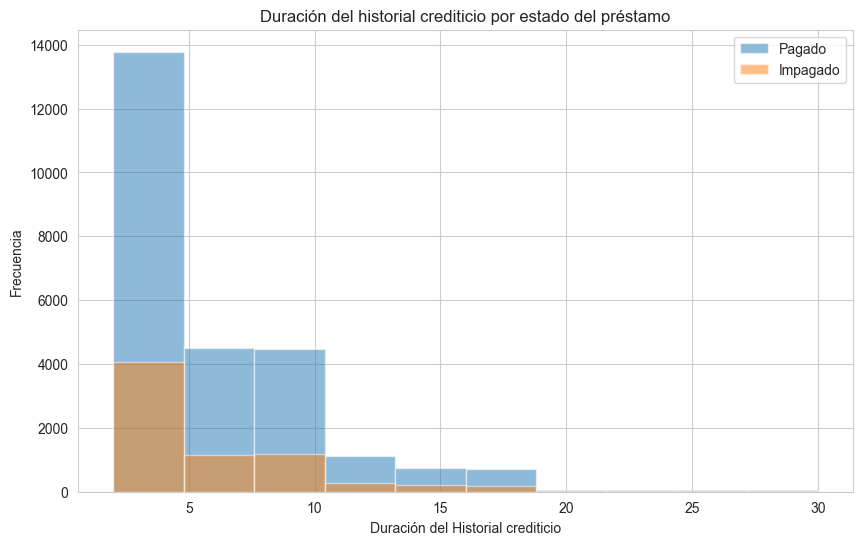

In [40]:
plt.figure(figsize=(10, 6))
datacredit[datacredit['loan_status'] == 0]['cb_person_cred_hist_length'].hist(alpha=0.5, label='Pagado')
datacredit[datacredit['loan_status'] == 1]['cb_person_cred_hist_length'].hist(alpha=0.5, label='Impagado')
plt.title('Duración del historial crediticio por estado del préstamo')
plt.xlabel('Duración del Historial crediticio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


* En el gráfico podemos observar que la duración entre 0 y 5 años, la mayoría de los préstamos se concentran en este rango  crediticio. La mayor parte de los préstamos pagados y una cantidad significativa de préstamos impagados se encuentran en este rango, especialmente alrededor de los primeros años (hasta los  5). En la duración entre 5 y 10 años, hay una disminución en la frecuencia tanto de los préstamos pagados como de los impagados. Los préstamos pagados todavía son más frecuentes que los impagados en este rango. Por otro lado en la duración mayor a 10 años, los préstamos se vuelven menos frecuentes en general. A medida que aumenta la duración del historial crediticio, la diferencia entre préstamos pagados e impagados se vuelve menos pronunciada, aunque los préstamos pagados siguen siendo más comunes.
* Las personas con historiales crediticios más cortos tienden a tener un mayor riesgo de incumplimiento. A medida que la duración del historial crediticio aumenta, la probabilidad de pagar el préstamo también aumenta.

# ¿Influye la edad de la persona en la probabilidad de incumplimiento ? 

Text(0, 0.5, 'Frecuencia')

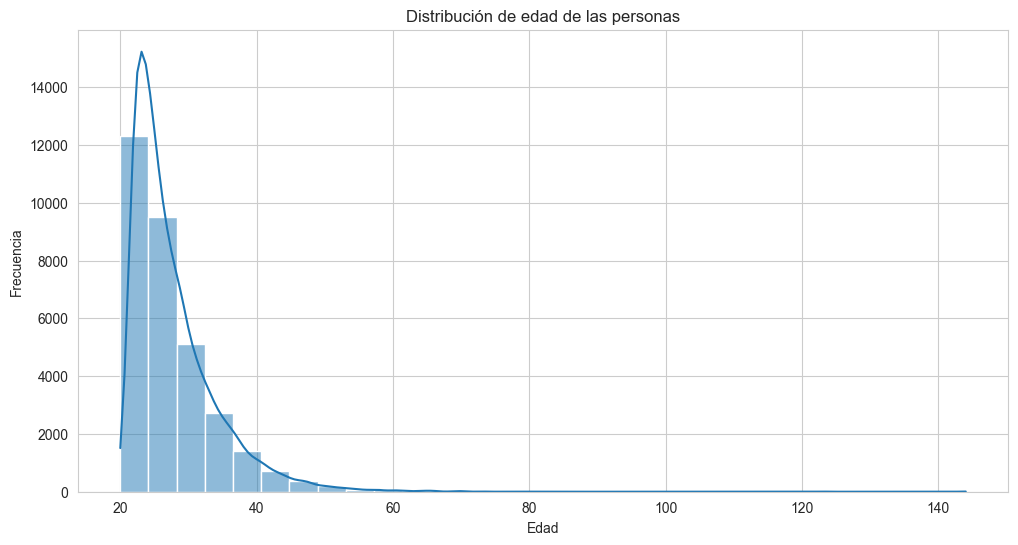

In [41]:
# Realizamos un histográma para ver la distribución de la edad de las personas
plt.figure(figsize=(12, 6))
sns.histplot(data=datacredit, x='person_age', bins=30, kde=True)
plt.title('Distribución de edad de las personas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

* Podemos apreciar que las edades de las personas que piden préstamos son principalmente entre los 20 - 30 años, disminuyendo drásticamente a medida que se acercan a los 40 años y superior. Indicando entonces que las personas más jovenes son las que piden más prestamos.

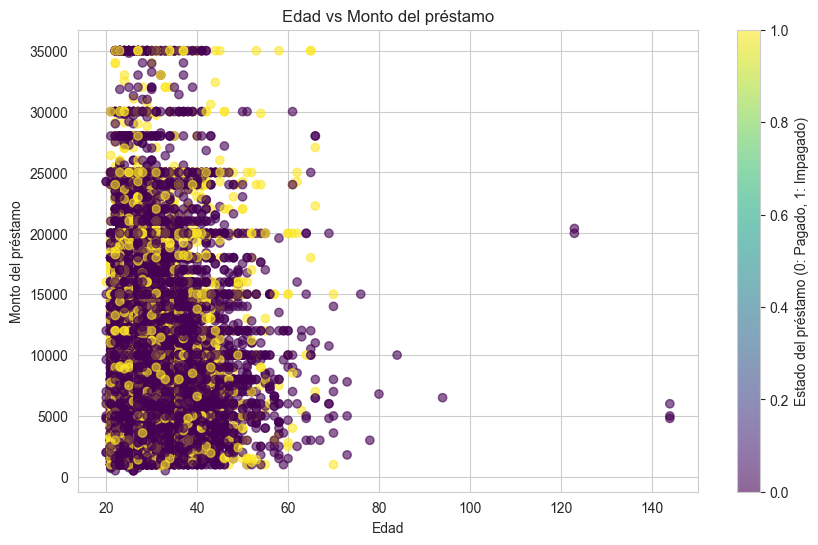

In [42]:
# Realizamos un gráfico para ver la relación entre la edad de las personas, el monto del préstamo y el estado del préstamo. 

plt.figure(figsize=(10,6))
plt.scatter(datacredit['person_age'], datacredit['loan_amnt'], c=datacredit['loan_status'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Estado del préstamo (0: Pagado, 1: Impagado)')
plt.xlabel('Edad')
plt.ylabel('Monto del préstamo')
plt.title('Edad vs Monto del préstamo')
plt.show()

* La mayoría de los puntos se concentran en las edades más jóvenes (de 20 a 60 años)
* Los préstamos impagados están distribuidos a lo largo de todas las edades, pero hay una mayor concentración en las edades más jóvenes.
* Los montos de los préstamos impagados incluyen tanto montos bajos como montos altos, aunque parece haber una mayor concentración de montos más altos (cerca de 35,000) entre las edades jóvenes.
* Los préstamos pagados parecen estar más distribuidos en términos de montos, sin una concentración clara en montos específicos.
* Ambos estados (pagado e impagado) se distribuyen a lo largo de diferentes edades y montos de préstamo, aunque los jóvenes parecen tener una mayor cantidad de préstamos de montos altos que son impagados

# ¿Existe una relación entre el tipo de vivienda de la persona y el estatus del préstamo?

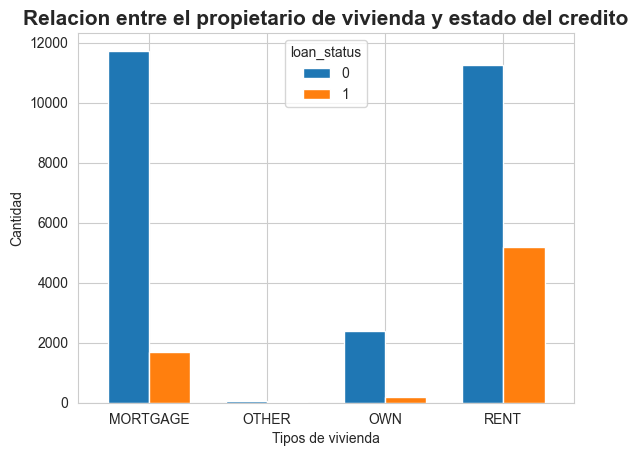

In [43]:
# Calculo la cantidad de personas agrupando a los tipos de propietarios de la vivienda y el estado de su credito
propietario = data_filtrada.groupby(['person_home_ownership', 'loan_status']).size().unstack()

# Recordamos que MORTGAGE = Hipoteca, RENT = Arriendo, OWn = vivienda propia. 
# Gráficamos
propietario.plot(kind='bar', width=0.7)

plt.xlabel('Tipos de vivienda')
plt.ylabel('Cantidad')
plt.title('Relacion entre el propietario de vivienda y estado del credito', fontsize=15,fontweight= 'bold')
plt.xticks(rotation= 360)
plt.show()

In [44]:
pd.crosstab(data_filtrada['person_home_ownership'], data_filtrada['loan_status'], normalize=0).mul(100)

loan_status,0,1
person_home_ownership,,
MORTGAGE,87.409670,12.590330
OTHER,69.158879,30.841121
OWN,92.522278,7.477722
RENT,68.422653,31.577347


* Las personas con hipotecas tienen la mayor cantidad de préstamos, con una buena tasa de pagos, sugiriendo que tienden a cumplir con sus obligaciones financieras.
* Las personas que arriendan vivienda, presentan una alta cantidad de préstamos similar a la de las personas con hipoteca, pero existe una gran cantidad de préstamos impagados. 
* Por otro lado, las personas con vivienda propia tienen una menor cantidad de préstamos, en su mayoria todos con el préstamo pagado.

# Conclusiones del EDA

* Los préstamos incumplidos tienden a tener montos más altos en comparación con los préstamos pagados. Esto sugiere que a medida que aumenta el monto del préstamo, también lo hace el riesgo de incumplimiento.

* Los préstamos incumplidos tienen tasas de interés más altas. Esto indica que los solicitantes con mayores tasas de interés tienen una mayor probabilidad de incumplir sus préstamos.

* Las calificaciones de los préstamos muestran diferencias significativas entre los préstamos pagados e incumplidos. Los préstamos con calificaciones más bajas (por ejemplo, C, D) tienen una mayor probabilidad de incumplimiento.

* Las personas con ingresos más altos tienden a pagar sus préstamos, mientras que aquellos que con ingresos más bajos tienen una mayor probabilidad de incumplimiento. 

* Las personas que arriendan vivienda, presentan una alta cantidad de préstamos similar a la de las personas con hipoteca, pero existe una gran cantidad de préstamos impagados.  

* Los solicitantes con un historial de crédito más corto tienen una mayor probabilidad de incumplimiento. Un historial de crédito más extenso parece estar asociado con una mayor capacidad para cumplir con las obligaciones del préstamos. 

* Las variables más relevantes identificadas son el monto del préstamo, la tasa de interés, la calificación del préstamo, el porcentaje del ingreso destinado al préstamo, el ingreso del solicitante y su historial de crédito. Estas variables muestran una fuerte correlación con el riesgo de incumplimiento.

* La tasa de interés y el monto del préstamo afectan significativamente la probabilidad de incumplimiento. Tasas de interés más altas y montos de préstamo más elevados están asociados con un mayor riesgo de incumplimiento.

* Se observan patrones en las características del solicitante. Los solicitantes con ingresos más bajos, menor duración de empleo y un historial de crédito más corto tienen un mayor riesgo de incumplimiento.

# Modelos de Machine Learning

### Modelo de Regresión Logística

In [45]:
# Codificamos las variables categóricas, transformandolas en variables numéricas. 
label_encoder = LabelEncoder()
datacredit['person_home_ownership'] = label_encoder.fit_transform(datacredit['person_home_ownership'])
datacredit['loan_grade'] = label_encoder.fit_transform(datacredit['loan_grade'])
datacredit['cb_person_default_on_file'] = label_encoder.fit_transform(datacredit['cb_person_default_on_file'])
datacredit['loan_intent'] = label_encoder.fit_transform(datacredit['loan_intent'])

In [46]:
# Seleccionamos las variables más significativas
significativas = ['loan_amnt', 'loan_int_rate', 'loan_grade', 'loan_intent', 'loan_percent_income', 'person_income', 'cb_person_default_on_file', 'person_home_ownership', 'cb_person_cred_hist_length', 'high_risk']

X = datacredit[significativas]
y = datacredit['loan_status']

In [47]:
y.value_counts(normalize=True).round(2)*100

loan_status
0    78.0
1    22.0
Name: proportion, dtype: float64

Se puede observar un desbalance de clases, lo cual para la metricas posteriores de los modelos el accuracy no es un valor del todo confiable. 

In [48]:
# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42  )

In [49]:
# Escalamos las variable X
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [50]:
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train_scale, y_train)

y_pred = modelo.predict(X_test_scale)

In [51]:
# Realizamos validacion cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [52]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(modelo, X, y, cv=kfold, scoring='accuracy')

print(f"\nK-Fold CV - Accuracy promedio: {cv_scores.mean():.4f}")
print(f"K-Fold CV - Desviación estándar: {cv_scores.std():.4f}")

C:\Users\milen\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\milen\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo


K-Fold CV - Accuracy promedio: 0.8363
K-Fold CV - Desviación estándar: 0.0045


C:\Users\milen\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
#Evaluar el performance general del modelo
train_accuracy_rf = modelo.score(X_train_scale, y_train)
test_accuracy_rf = modelo.score(X_test_scale, y_test)

print("\nEvaluación del performance de la Regresión Logitica:")
print(f"Accuracy en entrenamiento: {train_accuracy_rf:.4f}")
print(f"Accuracy en prueba: {test_accuracy_rf:.4f}")

if train_accuracy_rf - test_accuracy_rf > 0.05:
    print("La Regresión Logística muestra signos de overfitting.")
elif test_accuracy_rf < 0.65:  
    print("La Regresión Logística muestra signos de underfitting.")
else:
    print("La Regresión Logística parece tener un buen balance entre bias y varianza.")



Evaluación del performance de la Regresión Logitica:
Accuracy en entrenamiento: 0.8453
Accuracy en prueba: 0.8419
La Regresión Logística parece tener un buen balance entre bias y varianza.


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7613
           1       0.73      0.46      0.56      2162

    accuracy                           0.84      9775
   macro avg       0.79      0.70      0.73      9775
weighted avg       0.83      0.84      0.83      9775



In [55]:
# Creamos la matriz de confunsión.
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[7237,  376],
       [1169,  993]], dtype=int64)

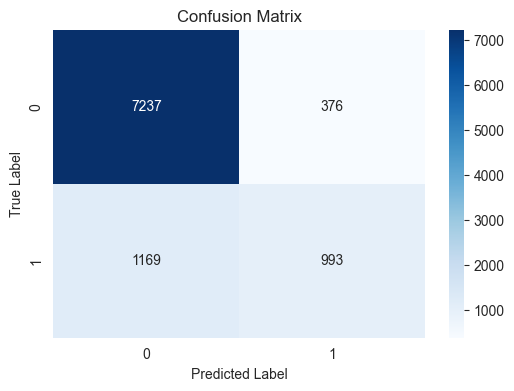

In [56]:
# Realizamos el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: Impago
#Clase 0: Pagado

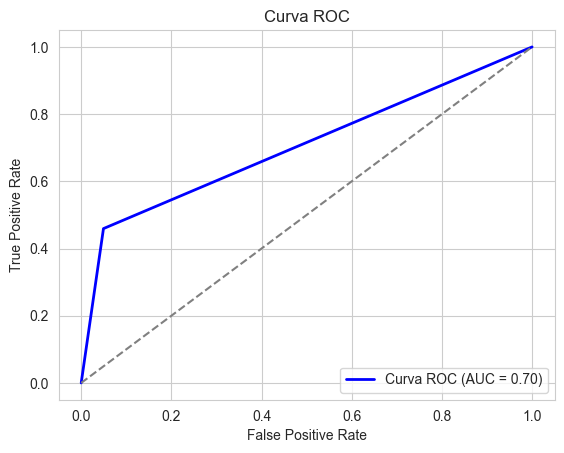

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

El modelo de regresión logística tiene un accuracy aceptable (0.84), si bien en este caso no es muy confiable debido al desbalance de clases, es un valor estable, por otro lado,  el recall en la clase 1 es bajo, indicando que esta fallando en detectar una gran proporción de clientes que incumplen. 
El AUC es de 0.70, indicando una capacidad moderada del modelo para diferenciar entre clientes incumplidores y no incumplidores. Aunque el valor esta por encima de 0.5, un 0.7 es bajo para una aplicación de riesgo crediticio, donde se busca una separación más clara entre las clases. 
Pareciera ser que el modelo se encuentra influenciado por el desbalance entre clases, clasificando con mayor precisión a la clase mayoritaria.

### Arbol de decisión

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:

# Definir el rango ampliado de hiperparámetros para el modelo de árbol de decisión
hiperparametros = {
    "criterion": ["gini", "entropy"],         # Funciones de evaluación para la división
    "max_depth": [3, 5, 7, 10, None],         # Profundidad máxima del árbol
    "ccp_alpha": np.logspace(-4, 0, 5)        # Valores para la poda de complejidad
}

# Configurar GridSearchCV con validación cruzada de 5 pliegues
busqueda = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=2024, class_weight="balanced"),
    param_grid=hiperparametros,
    scoring="f1",       # F1 score es adecuado para casos de desbalance en la variable objetivo
    cv=5,               # Validación cruzada de 5 pliegues
    n_jobs=-1,          # Usar todos los núcleos disponibles
    verbose=1
)

# Ajustar el modelo con los datos de entrenamiento
busqueda.fit(X_train_scale, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=2024),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None]},
             scoring='f1', verbose=1)

In [60]:
mejor_arbol = busqueda.best_estimator_
mejor_arbol.fit(X_train_scale, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=7,
                       random_state=2024)

In [61]:
y_test_pred = mejor_arbol.predict(X_test_scale)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7613
           1       0.85      0.71      0.78      2162

    accuracy                           0.91      9775
   macro avg       0.89      0.84      0.86      9775
weighted avg       0.91      0.91      0.91      9775



In [62]:
confusion_matrix(y_test_pred, y_test)

array([[7349,  624],
       [ 264, 1538]], dtype=int64)

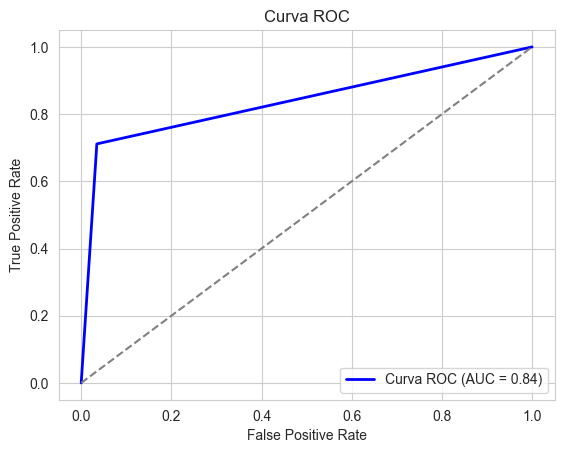

In [63]:
fpr, tpr, thresholds = roc_curve(y_test,  y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [64]:
scores = cross_val_score(mejor_arbol, X, y, cv=kfold, scoring='accuracy')

print(f"\nK-Fold CV - Accuracy promedio: {cv_scores.mean():.4f}")
print(f"K-Fold CV - Desviación estándar: {cv_scores.std():.4f}")


K-Fold CV - Accuracy promedio: 0.8363
K-Fold CV - Desviación estándar: 0.0045


In [65]:
#Evaluar el performance general del modelo
train_accuracy_rf = mejor_arbol.score(X_train_scale, y_train)
test_accuracy_rf = mejor_arbol.score(X_test_scale, y_test)

print("\nEvaluación del performance del Arbol de decisión:")
print(f"Accuracy en entrenamiento: {train_accuracy_rf:.4f}")
print(f"Accuracy en prueba: {test_accuracy_rf:.4f}")

if train_accuracy_rf - test_accuracy_rf > 0.05:
    print("El Arbol de decisión muestra signos de overfitting.")
elif test_accuracy_rf < 0.65:  
    print("El Arbol de decisión muestra signos de underfitting.")
else:
    print("El Arbol de decisión parece tener un buen balance entre bias y varianza.")



Evaluación del performance del Arbol de decisión:
Accuracy en entrenamiento: 0.9084
Accuracy en prueba: 0.9092
El Arbol de decisión parece tener un buen balance entre bias y varianza.


El modelo tiene un buen deesempeño en la clase 0 (no incumplimiento), con alta precisión (0.92) y recall (0.97), significando que el arbol identifica correctamente a la mayoria de los clientes que no incumplen. A su vez, para la clase 1 la precisión (0.85) y el F1-score (0.71) son bastante altos en comparación con la regresión logística. El recall 0.71, nos indica que el modelo esta capturando el 71% de los clientes que realmente incumplen.  
El modelo presenta un AUC de 0.84 indicando que el modelo tiene una buena capacidad para distinguir entre las clases. 
En comparación con la regresión logística, el arbol de decisión muestra un mejor desempeño para la clase de incumplimiento, especialmente en el recall, que aumento 71%. Esto significa que este m odleo tiene una mayor capacidad para capturar  a los clientes de alto riesgo. 

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hiperparametros = {
    "criterion": ["gini", "entropy"],
    "n_estimators": [100, 200, 300],       
    "max_depth": [8, 10, 12, 15],         
    "ccp_alpha": [0.0, 0.001, 0.01],       # Poda leve para evitar overfitting
    "min_samples_split": [5, 10],          # Divisiones mínimas para evitar árboles muy profundos
    "min_samples_leaf": [2, 4]             
}


busqueda = GridSearchCV(
    estimator=RandomForestClassifier(class_weight="balanced", random_state=2024, n_jobs=-1),
    param_grid=hiperparametros,
    scoring="f1",       
    cv=5,              
    n_jobs=-1,
    verbose=1
)


busqueda.fit(X_train_scale, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=2024),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 15],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [67]:
mejor_rf = busqueda.best_estimator_
mejor_rf.fit(X_train_scale, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=2024)

In [68]:
y_test_prd = mejor_rf.predict(X_test_scale)
print(classification_report(y_test, y_test_prd))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7613
           1       0.86      0.74      0.79      2162

    accuracy                           0.91      9775
   macro avg       0.89      0.85      0.87      9775
weighted avg       0.91      0.91      0.91      9775



In [69]:
confusion_matrix(y_test_prd, y_test)

array([[7349,  571],
       [ 264, 1591]], dtype=int64)

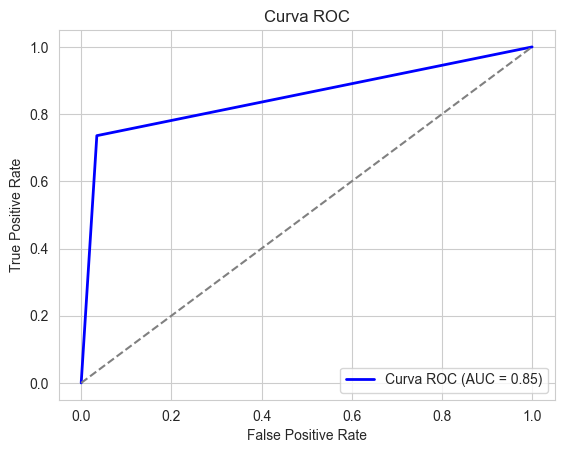

In [70]:
fpr, tpr, thresholds = roc_curve(y_test,  y_test_prd)
roc_auc = roc_auc_score(y_test, y_test_prd)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [71]:
cv = cross_val_score(mejor_rf, X, y, cv=kfold, scoring='accuracy')

print(f"\nK-Fold CV - Accuracy promedio: {cv_scores.mean():.4f}")
print(f"K-Fold CV - Desviación estándar: {cv_scores.std():.4f}")


K-Fold CV - Accuracy promedio: 0.8363
K-Fold CV - Desviación estándar: 0.0045


In [72]:
train_accuracy_rf = mejor_rf.score(X_train_scale, y_train)
test_accuracy_rf = mejor_rf.score(X_test_scale, y_test)

print("\nEvaluación del performance del Random Forest:")
print(f"Accuracy en entrenamiento: {train_accuracy_rf:.4f}")
print(f"Accuracy en prueba: {test_accuracy_rf:.4f}")

if train_accuracy_rf - test_accuracy_rf > 0.05:
    print("El Random Forest muestra signos de overfitting.")
elif test_accuracy_rf < 0.65:  
    print("El Random Forest muestra signos de underfitting.")
else:
    print("El Random Forest parece tener un buen balance entre bias y varianza.")



Evaluación del performance del Random Forest:
Accuracy en entrenamiento: 0.9526
Accuracy en prueba: 0.9146
El Random Forest parece tener un buen balance entre bias y varianza.


El modelo de Random Forest muestra un buen desempeño en general, con un AUC de 0.85, que indica que el modelo tiene una buena capacidad para distinguir entre clientes de alto y bajo riesgo, con un accuracy de 91%, aunque en este caso el accuracy no es muy confiable pues tenemos clases desbalanceadas. 
Tenemos un F1-Score de 0.79 y un recall de 0.74, lo cual es un buen resultado, para la captura de incumplidores.
La precisión 0.86 y el F1-score 0.79, son buenos resultados, lo cual indica que el modelo es bastante efectivo al identificar clientes de alto riesgo.
El Random Forest es un buen modelo para predecir el riesgo de incumplimiento.

 # Conclusiones

* El modelo de regresión logística tiene un rendimiento limitado en la clase de incumplimiento. Con un recall de 0.46, el modelo estpa capturando menos de la mitad de los clientes de alto riesgo, lo cual no es adecuado para el objetivo de predecir incumientos de manera confiable. 

* El árbol de decisión mostró un mejor desempeño que la regresión logística en la detección de clientes de alto riesgo de incumplimineto, con un recall de 0.71, lo cual significa que captura una mayor proporción de incumplimientos. 

* El modelo de Random Forest ha mostrado mejor rendimiento entre los tres modelos evaluados. Con un Recall de 0.74 y un F1-score de 0.79 para la clase de incumplimiento, Random Forest es el más efectivo para capturar clientes de alto riesgo, lo que es fundamental para el objetivo del proyecto. Además, el AUC de 0.85 sugiere que presenta una buena capacidad para separar las clases, lo cual es escencial para una predicción precisa en problemas de riesgo de incumplimiento.

* Dado el objetivo del proyecto, el Random Forest es el modelo más adecuado y efectivo de los tres modelos debido a su capacidad para capturar mejor los casos de incumplimiento, manteniendo un buen balance entre precisión y recall, proporciona una predicción robusta y confiable para la identificación de clientes de alto riesgo de incumplimiento. 